In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors

In [32]:
from matplotlib.colors import ListedColormap
def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('K value = '+str(n_neighbors))
    plt.show()

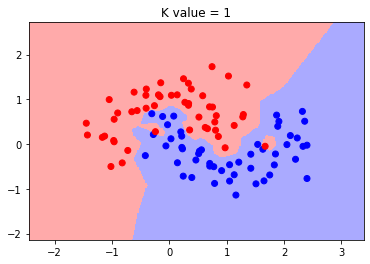

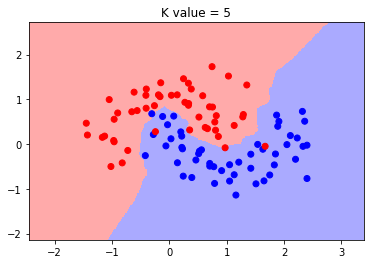

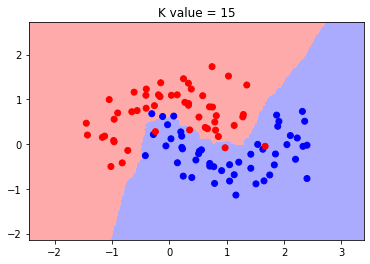

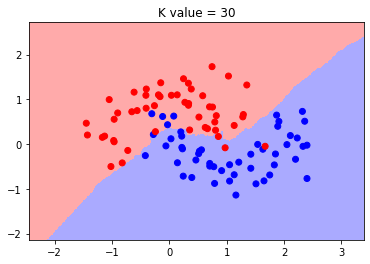

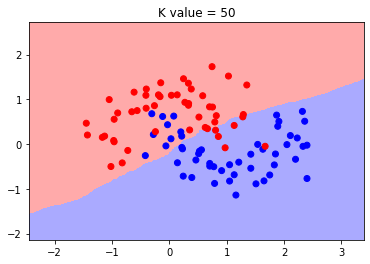

In [33]:
import os
os.chdir(r'E:\Courses\Data Science Journey\Classification and Regression\KNN Various Scenarios\demo_data')
data = np.genfromtxt('1.ushape.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

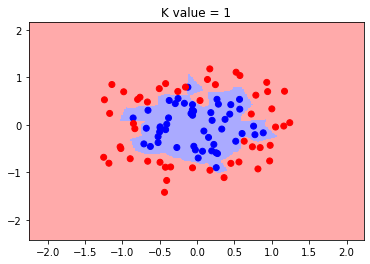

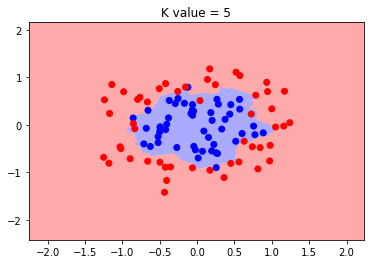

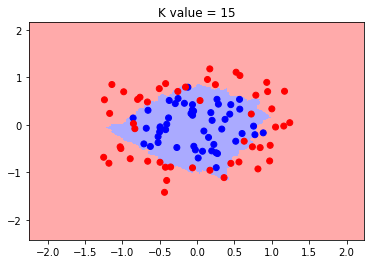

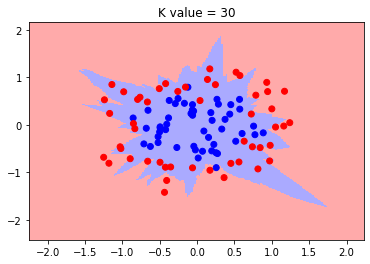

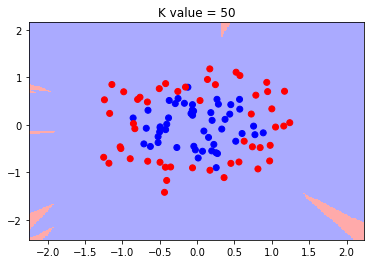

In [5]:
import os
os.chdir(r'E:\Courses\Data Science Journey\Classification and Regression\KNN Various Scenarios\demo_data')
data = np.genfromtxt('2.concerticcir1.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

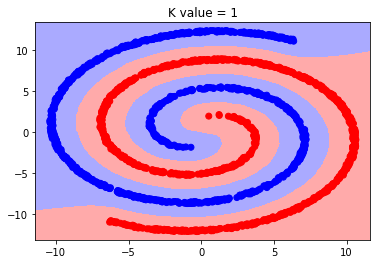

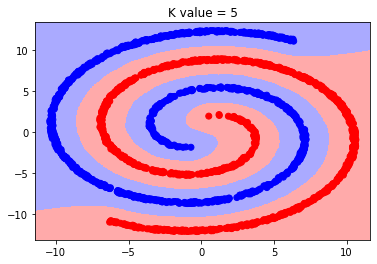

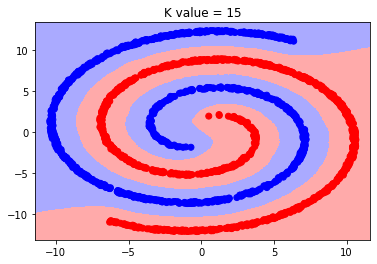

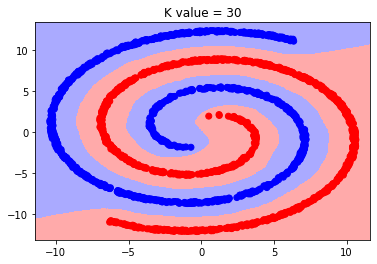

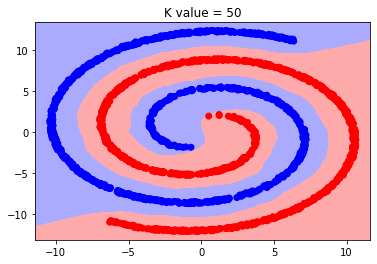

In [6]:
import os
os.chdir(r'E:\Courses\Data Science Journey\Classification and Regression\KNN Various Scenarios\demo_data')
data = np.genfromtxt('8.twospirals.csv', delimiter=',')
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data,15)
knn_comparison(data, 30)
knn_comparison(data, 50)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [35]:
names = ['x', 'y', 'class']
import os
os.chdir(r'E:\Courses\Data Science Journey\Classification and Regression\KNN Various Scenarios\demo_data')
df = pd.read_csv('3.concertriccir2.csv', header=None, names=names)
print(df.head())

       x      y  class
0  0.770 -0.272    0.0
1 -4.350  3.010    1.0
2  0.165 -2.370    1.0
3 -1.840 -1.040    1.0
4  2.820 -2.030    1.0


In [36]:
X = np.array(df.iloc[:, 0:2])

In [37]:
X

array([[ 7.70e-01, -2.72e-01],
       [-4.35e+00,  3.01e+00],
       [ 1.65e-01, -2.37e+00],
       [-1.84e+00, -1.04e+00],
       [ 2.82e+00, -2.03e+00],
       [-1.90e+00,  3.81e+00],
       [ 2.09e-01,  1.87e+00],
       [-3.68e-01,  1.13e+00],
       [ 3.41e+00, -2.95e+00],
       [-1.36e+00, -1.35e+00],
       [-4.17e-01,  8.25e-01],
       [ 3.21e+00, -2.29e+00],
       [-2.94e-03, -2.17e+00],
       [ 8.24e-01,  2.14e-01],
       [ 1.76e+00, -1.71e+00],
       [ 5.45e-01, -2.04e+00],
       [ 2.27e+00, -3.20e+00],
       [-1.13e+00, -1.35e+00],
       [-1.16e+00,  2.63e+00],
       [-1.71e+00,  1.78e+00],
       [-1.59e+00,  1.24e+00],
       [ 9.45e-02,  3.28e-01],
       [ 1.90e-01,  1.76e+00],
       [ 3.87e-01, -4.61e-01],
       [ 4.67e-01, -5.48e-01],
       [ 9.66e-01,  1.49e+00],
       [ 2.08e-02, -1.08e+00],
       [-1.01e+00,  1.40e+00],
       [ 1.32e+00, -1.34e+00],
       [ 2.71e+00, -1.18e+00],
       [ 5.70e-01, -1.62e+00],
       [ 1.76e+00,  2.36e+00],
       [

In [38]:
y = np.array(df['class'])

In [39]:
y

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1.

In [14]:
X

array([[ 7.70e-01, -2.72e-01],
       [-4.35e+00,  3.01e+00],
       [ 1.65e-01, -2.37e+00],
       [-1.84e+00, -1.04e+00],
       [ 2.82e+00, -2.03e+00],
       [-1.90e+00,  3.81e+00],
       [ 2.09e-01,  1.87e+00],
       [-3.68e-01,  1.13e+00],
       [ 3.41e+00, -2.95e+00],
       [-1.36e+00, -1.35e+00],
       [-4.17e-01,  8.25e-01],
       [ 3.21e+00, -2.29e+00],
       [-2.94e-03, -2.17e+00],
       [ 8.24e-01,  2.14e-01],
       [ 1.76e+00, -1.71e+00],
       [ 5.45e-01, -2.04e+00],
       [ 2.27e+00, -3.20e+00],
       [-1.13e+00, -1.35e+00],
       [-1.16e+00,  2.63e+00],
       [-1.71e+00,  1.78e+00],
       [-1.59e+00,  1.24e+00],
       [ 9.45e-02,  3.28e-01],
       [ 1.90e-01,  1.76e+00],
       [ 3.87e-01, -4.61e-01],
       [ 4.67e-01, -5.48e-01],
       [ 9.66e-01,  1.49e+00],
       [ 2.08e-02, -1.08e+00],
       [-1.01e+00,  1.40e+00],
       [ 1.32e+00, -1.34e+00],
       [ 2.71e+00, -1.18e+00],
       [ 5.70e-01, -1.62e+00],
       [ 1.76e+00,  2.36e+00],
       [

In [15]:
y

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1.

In [40]:
#Data into train and test
x_1, x_test, y_1, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
x_train, x_cv, y_train, y_cv = train_test_split(x_1,y_1,test_size=0.3,random_state=0)

In [41]:
len(x_test)/len(X)

0.3

In [42]:
len(X)

500

In [43]:
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_cv)
    acc = accuracy_score(y_cv,pred,normalize=True)*float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i,acc))
    
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred, normalize=True)*float(100)
print('\nTest data accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 91%

CV accuracy for k = 3 is 84%

CV accuracy for k = 5 is 87%

CV accuracy for k = 7 is 87%

CV accuracy for k = 9 is 81%

CV accuracy for k = 11 is 83%

CV accuracy for k = 13 is 81%

CV accuracy for k = 15 is 80%

CV accuracy for k = 17 is 79%

CV accuracy for k = 19 is 72%

CV accuracy for k = 21 is 73%

CV accuracy for k = 23 is 72%

CV accuracy for k = 25 is 67%

CV accuracy for k = 27 is 65%

CV accuracy for k = 29 is 64%

Test data accuracy for k = 1 is 90%


In [44]:
knn.predict(x_train)

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0.

In [45]:
df

,x,y,class
0,0.770,-0.272,0.0
1,-4.350,3.010,1.0
2,0.165,-2.370,1.0
3,-1.840,-1.040,1.0
4,2.820,-2.030,1.0
...,...,...,...
495,2.400,3.280,1.0
496,1.960,3.160,1.0
497,0.984,3.380,0.0
498,0.934,4.260,0.0


In [46]:
X = np.array(df.iloc[:, 0:2])

In [47]:
X

array([[ 7.70e-01, -2.72e-01],
       [-4.35e+00,  3.01e+00],
       [ 1.65e-01, -2.37e+00],
       [-1.84e+00, -1.04e+00],
       [ 2.82e+00, -2.03e+00],
       [-1.90e+00,  3.81e+00],
       [ 2.09e-01,  1.87e+00],
       [-3.68e-01,  1.13e+00],
       [ 3.41e+00, -2.95e+00],
       [-1.36e+00, -1.35e+00],
       [-4.17e-01,  8.25e-01],
       [ 3.21e+00, -2.29e+00],
       [-2.94e-03, -2.17e+00],
       [ 8.24e-01,  2.14e-01],
       [ 1.76e+00, -1.71e+00],
       [ 5.45e-01, -2.04e+00],
       [ 2.27e+00, -3.20e+00],
       [-1.13e+00, -1.35e+00],
       [-1.16e+00,  2.63e+00],
       [-1.71e+00,  1.78e+00],
       [-1.59e+00,  1.24e+00],
       [ 9.45e-02,  3.28e-01],
       [ 1.90e-01,  1.76e+00],
       [ 3.87e-01, -4.61e-01],
       [ 4.67e-01, -5.48e-01],
       [ 9.66e-01,  1.49e+00],
       [ 2.08e-02, -1.08e+00],
       [-1.01e+00,  1.40e+00],
       [ 1.32e+00, -1.34e+00],
       [ 2.71e+00, -1.18e+00],
       [ 5.70e-01, -1.62e+00],
       [ 1.76e+00,  2.36e+00],
       [

In [48]:
y = np.array(df['class'])

In [49]:
y

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [52]:
len(df)

500

In [53]:
len(X_train)

350

In [54]:
len(X_test)

150

In [57]:
mylist = list(range(0,50))
mylist
neighbors = list(filter(lambda x : x%2!=0, mylist))

In [64]:
import time
neighbors
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print(cv_scores)

[0.8857142857142858, 0.8942857142857144, 0.8800000000000001, 0.8714285714285716, 0.8685714285714287, 0.8657142857142859, 0.862857142857143, 0.8685714285714287, 0.8285714285714285, 0.8257142857142856, 0.8285714285714285, 0.8142857142857143, 0.7942857142857143, 0.7914285714285715, 0.7628571428571429, 0.7542857142857142, 0.7457142857142858, 0.7371428571428572, 0.7314285714285715, 0.7257142857142858, 0.7142857142857142, 0.7200000000000001, 0.7114285714285714, 0.6914285714285715, 0.6828571428571428]


In [67]:
MSE = [1-x for x in cv_scores]

In [68]:
MSE

[0.11428571428571421,
 0.10571428571428565,
 0.11999999999999988,
 0.12857142857142845,
 0.13142857142857134,
 0.13428571428571412,
 0.137142857142857,
 0.13142857142857134,
 0.17142857142857149,
 0.17428571428571438,
 0.17142857142857149,
 0.18571428571428572,
 0.20571428571428574,
 0.20857142857142852,
 0.2371428571428571,
 0.24571428571428577,
 0.2542857142857142,
 0.2628571428571428,
 0.26857142857142846,
 0.27428571428571424,
 0.2857142857142858,
 0.2799999999999999,
 0.2885714285714286,
 0.3085714285714285,
 0.31714285714285717]

In [69]:
optimal_k = neighbors[MSE.index(min(MSE))]
print('\n The optimal number if neighbors are: ', optimal_k)


 The optimal number if neighbors are:  3


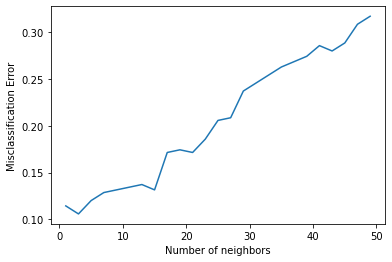

In [71]:
plt.plot(neighbors,MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [74]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print('The accuracy with KNN', optimal_k, 'we are getting: ', acc)

The accuracy with KNN 3 we are getting:  87.33333333333333
